In [ ]:
pip install gpytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.6/175.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
pip install higher

# **Creating the dataset**

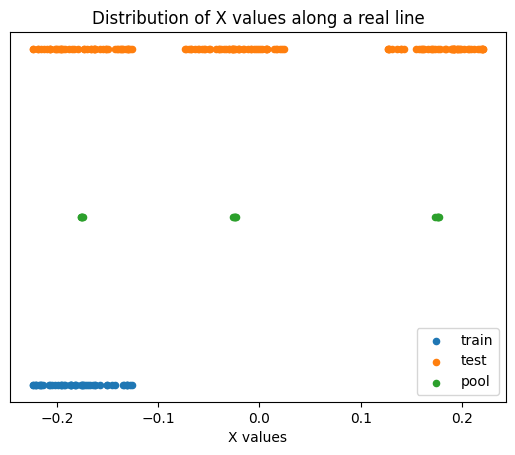

In [ ]:
#run below code twice
#from line_profiler import LineProfiler
import torch
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd
import plotnine as gg
import torch
import torch.optim as optim

import higher

from torch import nn
# from acme.utils.loggers.terminal import TerminalLogger
import dataclasses
#import chex
#import haiku as hk
#import jax
#import jax.numpy as jnp
#import optax
import pandas as pd
#import warnings
import gpytorch
from torch.distributions.bernoulli import Bernoulli
#warnings.filterwarnings('ignore')

#import pipeline_var_l2_loss
import seaborn as sns
#from dataloader import TabularDataset
#from var_l2_loss_estimator import *
#from ENN import basenet_with_learnable_epinet_and_ensemble_prior
import matplotlib.pyplot as plt

num_init_train_samples = 50
num_pool_samples = 5
num_test_samples = 50

input_dim = 1

init_train_x = torch.rand((num_init_train_samples, input_dim))*50.0/500.0-0.225

test_x_1 = torch.rand((num_test_samples, input_dim))*50.0/500.0-0.225
test_x_2 = 75.0/500.0 + torch.rand((num_test_samples, input_dim))*50.0/500.0-0.225
test_x_3 = 175.0/500.0 + torch.rand((num_test_samples, input_dim))*50.0/500.0-0.225

test_x = torch.cat([test_x_1,test_x_2,test_x_3])

pool_x_1 = 24/500.0 + torch.rand((num_pool_samples, input_dim))*2/500.0-0.225
pool_x_2 = 99/500.0 + torch.rand((num_pool_samples, input_dim))*2/500.0-0.225
pool_x_3 = 199/500.0 + torch.rand((num_pool_samples, input_dim))*2/500.0-0.225

pool_x = torch.cat([pool_x_1,pool_x_2,pool_x_3])

x = torch.cat([init_train_x,test_x,pool_x])
y = torch.zeros(num_init_train_samples+3*num_pool_samples+3*num_test_samples)

init_train_x_numpy = init_train_x.numpy()
init_train_y = torch.zeros(init_train_x.size(0))
test_x_numpy = test_x.numpy()
test_y = torch.ones(test_x.size(0))
pool_x_numpy = pool_x.numpy()
pool_y = torch.empty(pool_x.size(0)).fill_(0.5)


plt.scatter(init_train_x_numpy, init_train_y.numpy(), s=20, label='train')
plt.scatter(test_x_numpy, test_y.numpy(), s=20, label='test')
plt.scatter(pool_x_numpy, pool_y.numpy(), s=20, label='pool')

plt.yticks([])  # Hide y-axis ticks
plt.xlabel('X values')
plt.legend()
plt.title('Distribution of X values along a real line')
plt.show()

# **Simpler version of the f(x) from which label is sampled using sigmoid**

In [ ]:
#w= torch.randn((1,1))
w=2.0
temp = 25.0/50.0
f_x = w*x


# Apply the sigmoid function to get probabilities
probabilities = torch.sigmoid(-temp*f_x)

# Create a Bernoulli distribution with the given probabilities
distribution = Bernoulli(probs=probabilities)

# Sample y values from the distribution
y_blr_new = distribution.sample()

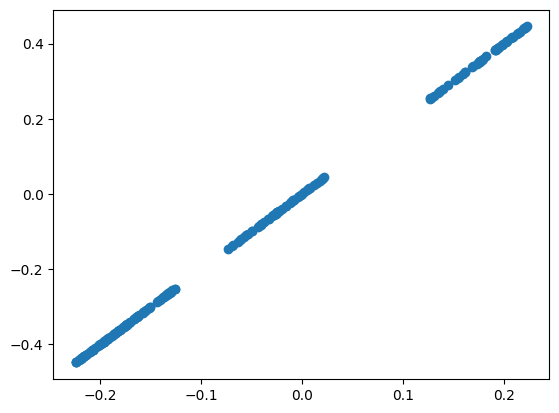

In [ ]:
plt.scatter(x,f_x)

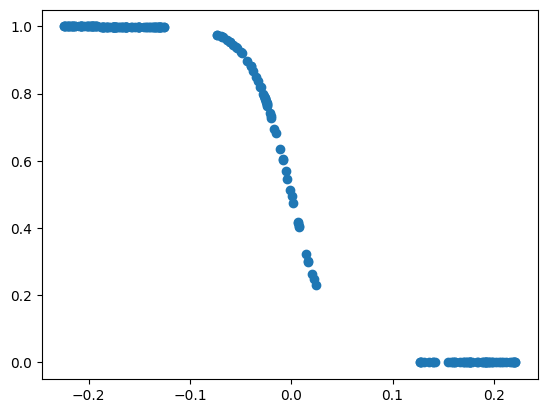

In [ ]:
plt.scatter(x,probabilities)

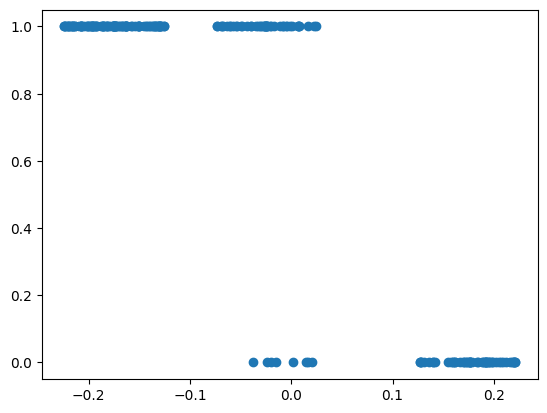

In [ ]:
plt.scatter(x,y_blr_new)

(-1.0, 2.0)

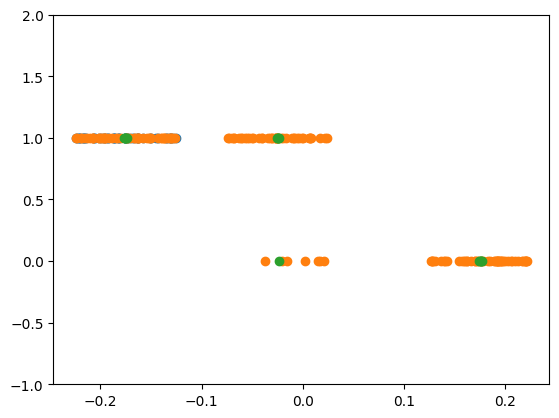

In [ ]:
plt.scatter(x[:num_init_train_samples],y_blr_new[:num_init_train_samples], label='train')
plt.scatter(x[num_init_train_samples:num_init_train_samples+3*num_test_samples],y_blr_new[num_init_train_samples:num_init_train_samples+3*num_test_samples], label='test')
plt.scatter(x[num_init_train_samples+3*num_test_samples:],y_blr_new[num_init_train_samples+3*num_test_samples:], label='pool')
plt.ylim(-1, 2)

# **GP version of the f(x) from which label is sampled using sigmoid**

In [ ]:


# Define parameters for the model
mean_constant = 0.0  # Mean of the GP
length_scale = [[25.0/500.0]]   # Length scale of the RBF kernel
output_scale = 5.0
noise_std = 0.1      # Standard deviation of the noise



mean_module = gpytorch.means.ConstantMean()
base_kernel = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel(ard_num_dims=input_dim))
likelihood = gpytorch.likelihoods.GaussianLikelihood()



mean_module.constant = mean_constant
base_kernel.base_kernel.lengthscale = length_scale
base_kernel.outputscale = output_scale
likelihood.noise_covar.noise = noise_std**2

In [ ]:
class CustomizableGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, mean_module, base_kernel, likelihood):
        super(CustomizableGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = mean_module
        self.covar_module = base_kernel
        self.likelihood = likelihood

    def forward(self, x):
        return gpytorch.distributions.MultivariateNormal(self.mean_module(x), self.covar_module(x))



model = CustomizableGPModel(x, y, mean_module, base_kernel, likelihood)

# Sample from the prior for training data
model.eval()
likelihood.eval()
with torch.no_grad():
    prior_dist = model(x)
    f_x = prior_dist.sample()



temp =1.0
 # Apply the sigmoid function to get probabilities
probabilities = torch.sigmoid(temp*f_x)

# Create a Bernoulli distribution with the given probabilities
distribution = Bernoulli(probs=probabilities)

# Sample y values from the distribution
y_gp_new = distribution.sample()

/usr/local/lib/python3.10/dist-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
/usr/local/lib/python3.10/dist-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
/usr/local/lib/python3.10/dist-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
/usr/local/lib/python3.10/dist-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-04 to the diagonal


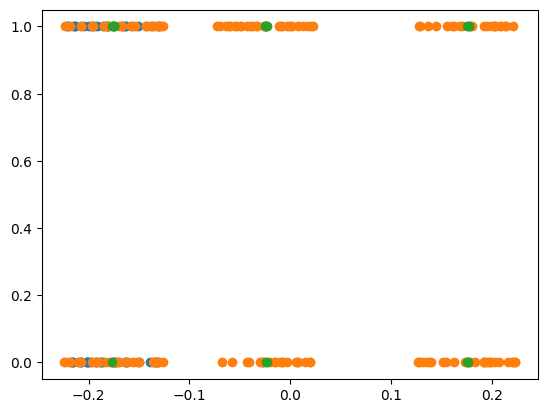

In [ ]:
plt.scatter(x[:num_init_train_samples],y_gp_new[:num_init_train_samples], label='train')
plt.scatter(x[num_init_train_samples:num_init_train_samples+3*num_test_samples],y_gp_new[num_init_train_samples:num_init_train_samples+3*num_test_samples], label='test')
plt.scatter(x[num_init_train_samples+3*num_test_samples:],y_gp_new[num_init_train_samples+3*num_test_samples:], label='pool')

# **Defining parameter classes**

In [ ]:
import argparse
import typing

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.distributions as distributions
import numpy as np
from dataclasses import dataclass
import time
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
@dataclass
class DatasetConfig:
    csv_file_train: str
    csv_file_test: str
    csv_file_pool: str
    y_column: str  # Assuming same column name across above 3 sets


@dataclass
class ModelConfig:
    batch_size_train: int
    batch_size_test: int
    batch_size_query: int
    temp_k_subset: float
    hidden_sizes_weight_NN: list
    meta_opt_lr: float
    n_classes: int
    n_epoch: int
    init_train_lr: float
    init_train_weight_decay: float
    n_train_init: int
    meta_opt_weight_decay: float





@dataclass
class TrainConfig:
    n_train_iter: int
    n_ENN_iter: int
    ENN_opt_lr: float
    ENN_opt_weight_decay: float
    N_iter_noise: float
    z_dim: int
    N_iter: int
    seed_var_l2: int
    sigma_noise: float


@dataclass
class ENNConfig:
    basenet_hidden_sizes: list
    exposed_layers: list
    z_dim: int
    learnable_epinet_hiddens: list
    hidden_sizes_prior: list
    seed_base: int
    seed_learnable_epinet: int
    seed_prior_epinet: int
    alpha: float


# **Epistemic Neural Network**

In [ ]:
# ENN takes in x of dim [N,D] and z of dim [z_dim]
# ENN outputs y of dim [N,n_classes]      (GP in gpytorch takes in inputs(while setting the train data) and outputs y of dim [N])
# nn.CrossEntropyLoss()   -  only takes y_targets as [N]
# nn.mse_loss() - will take in y_target depending on dimension of output of ENN - as it is [N,1] - therefore y_target should be [N,1]
# currently ouputs from the GP is [N] and also the outputs from blr is [N]



import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init




class basenet_with_learnable_epinet_and_ensemble_prior(nn.Module):
    def __init__(self, input_size, basenet_hidden_sizes, n_classes, exposed_layers, z_dim, learnable_epinet_hiddens, hidden_sizes_prior, seed_base, seed_learnable_epinet, seed_prior_epinet, alpha):
        super(basenet_with_learnable_epinet_and_ensemble_prior, self).__init__()


        self.z_dim = z_dim
        self.n_classes = n_classes
        self.num_ensemble = z_dim
        self.alpha = alpha


        # Create a list of all sizes (input + hidden + output)
        basenet_all_sizes = [input_size] + basenet_hidden_sizes + [n_classes]

        self.basenet_all_sizes = basenet_all_sizes
        exposed_layers = [True]+exposed_layers+[False]     # assuming input is always included and output is never included

        self.exposed_layers = exposed_layers

        torch.manual_seed(seed_base)
        # Dynamically create layers
        self.basenet_layers = nn.ModuleList()
        for i in range(len(basenet_all_sizes) - 1):
            self.basenet_layers.append(nn.Linear(basenet_all_sizes[i], basenet_all_sizes[i + 1]))


        sum_input_base_epi = sum(basenet_all_size for basenet_all_size, exposed_layer in zip(basenet_all_sizes, exposed_layers) if exposed_layer)

        learnable_epinet_all_sizes = [sum_input_base_epi+z_dim]    + learnable_epinet_hiddens + [n_classes*z_dim]

        self.learnable_epinet_all_sizes = learnable_epinet_all_sizes

        torch.manual_seed(seed_learnable_epinet)
        self.learnable_epinet_layers = nn.ModuleList()
        for j in range(len(learnable_epinet_all_sizes) - 1):
            self.learnable_epinet_layers.append(nn.Linear(learnable_epinet_all_sizes[j], learnable_epinet_all_sizes[j + 1]))




        torch.manual_seed(seed_prior_epinet)
        self.ensemble = nn.ModuleList()
        for _ in range(self.num_ensemble):
            layers = []
            all_sizes_prior = [sum_input_base_epi] + hidden_sizes_prior + [n_classes]
            for i in range(len(all_sizes_prior) - 1):
                layer = nn.Linear(all_sizes_prior[i], all_sizes_prior[i + 1])


                # Initialize weights and biases here
                init.xavier_uniform_(layer.weight)
                init.zeros_(layer.bias)

                layers.append(layer)
                if i < len(all_sizes_prior) - 2:
                    layers.append(nn.ReLU())

            mlp = nn.Sequential(*layers)

            # Freeze the parameters of this MLP
            for param in mlp.parameters():
                param.requires_grad = False

            self.ensemble.append(mlp)







    def forward(self, x, z):
        hidden_outputs = []
        #concatenate_hidden = x   #assuming x is always input


        for i, (basenet_layer, flag) in enumerate(zip(self.basenet_layers, self.exposed_layers)):
            if flag:
                hidden_outputs.append(x)


            x = basenet_layer(x)

            if i < len(self.basenet_layers) - 1:  # Apply activation function except for the output layer
                x = torch.relu(x)


            #if i>0 and flag:
                #concatenate_hidden = torch.cat(x,concatenate_hidden, dim=1)

        concatenate_hidden = torch.cat(hidden_outputs, dim=1)

        detached_concatenate_hidden = concatenate_hidden.detach()                    ###-------NOT SURE IF BACKPROP WILL WORK PROPERLY THROUGH THIS

        detached_concatenate_hidden_to_prior = concatenate_hidden.detach()
        ###-------NOT SURE IF BACKPROP WILL WORK PROPERLY THROUGH THIS - should we clone and detach


        z_repeated = z.unsqueeze(0).repeat(detached_concatenate_hidden.size(0), 1)

        combined_output = torch.cat([detached_concatenate_hidden,z_repeated], dim=1)




        for j, learnable_epinet_layer in enumerate(self.learnable_epinet_layers):
            combined_output = learnable_epinet_layer(combined_output)

            if j < len(self.learnable_epinet_layers) - 1:  # Apply activation function except for the output layer
                combined_output = torch.relu(combined_output)

        #reshaped_output = combined_output_learnable.view(inputs.shape[0], self.num_classes, self.z_dim)
        reshaped_epinet_output = torch.reshape(combined_output, (combined_output.shape[0], self.n_classes, self.z_dim))

        epinet_output = torch.matmul(reshaped_epinet_output, z)


        outputs_prior = [mlp(detached_concatenate_hidden_to_prior) for mlp in self.ensemble]

        outputs_prior_tensor = torch.stack(outputs_prior, dim=0)

        prior_output = torch.einsum('nbo,n->bo', outputs_prior_tensor, z)

        final_output =  x + epinet_output + self.alpha* prior_output




        return final_output






#optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)

# optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.01)

In [ ]:
Z_dim = 8
lr_enn = 0.02
wd_enn = 0
n_steps = 100
Basenet_hidden_sizes = [50,50]
Exposed_layers = [False, True]
Learnable_epinet_hiddens = [15,15]
Hidden_sizes_prior = [5,5]
Alpha =5.0
n_classes = 2
model_config = ModelConfig(batch_size_train = 10000, batch_size_test = 500, batch_size_query = 100, temp_k_subset = 0.1, hidden_sizes_weight_NN = [50,50], meta_opt_lr = 0.01, n_classes = n_classes, n_epoch = 5, init_train_lr = lr_enn, init_train_weight_decay = wd_enn, n_train_init = n_steps, meta_opt_weight_decay = 0.01)
train_cfg = TrainConfig(n_train_iter = 500, n_ENN_iter = 1000, ENN_opt_lr = 0.01, N_iter_noise = 10, sigma_noise = 0.5, seed_var_l2 = 123, z_dim = Z_dim, N_iter = 100, ENN_opt_weight_decay = 0.0001) #temp_var_recall is the new variable added here
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



enn_config = ENNConfig(basenet_hidden_sizes = Basenet_hidden_sizes,  exposed_layers = Exposed_layers, z_dim = Z_dim, learnable_epinet_hiddens = Learnable_epinet_hiddens, hidden_sizes_prior = Hidden_sizes_prior, seed_base = 2, seed_learnable_epinet = 1, seed_prior_epinet = 0, alpha = Alpha)


# **Some basic tests to make the model run and understand ENN**

In [ ]:
z_dim =8
z_pool_train = torch.randn(z_dim)
z_pool_train
input_feature_size = 4
x= torch.rand(2,4)
ENN = basenet_with_learnable_epinet_and_ensemble_prior(input_feature_size, enn_config.basenet_hidden_sizes, model_config.n_classes, enn_config.exposed_layers, enn_config.z_dim, enn_config.learnable_epinet_hiddens, enn_config.hidden_sizes_prior, enn_config.seed_base, enn_config.seed_learnable_epinet, enn_config.seed_prior_epinet, enn_config.alpha).to(device)

outputs=ENN(x,z_pool_train)
outputs

tensor([[-1.6549,  0.0773],
        [ 0.6152,  3.1815]], grad_fn=<AddBackward0>)

In [ ]:
loss_fn_init = nn.CrossEntropyLoss()
labels = torch.tensor([0,0])
loss = loss_fn_init(outputs, labels)
print(loss)
labels2 = torch.tensor([[0],[0]])
loss2 = loss_fn_init(outputs, labels2)
print(loss2)


# **Training of ENNs - model within training function**

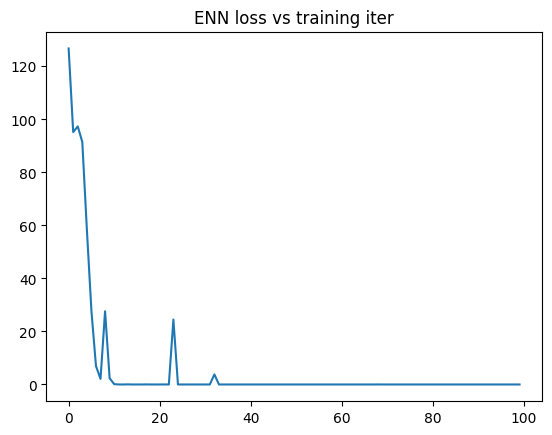

In [ ]:
class TabularDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self, idx):

        return self.x[idx], self.y[idx]



def ENN_training(x_train, y_train, model_config, train_config, enn_config, device, if_print):

    dataset_train = TabularDataset(x = x_train, y = y_train)
    dataloader_train = DataLoader(dataset_train, batch_size=model_config.batch_size_train, shuffle=False)
    sample, label = dataset_train[0]
    input_feature_size = sample.shape[0]

     # to_device
    ENN = basenet_with_learnable_epinet_and_ensemble_prior(input_feature_size, enn_config.basenet_hidden_sizes, model_config.n_classes, enn_config.exposed_layers, enn_config.z_dim, enn_config.learnable_epinet_hiddens, enn_config.hidden_sizes_prior, enn_config.seed_base, enn_config.seed_learnable_epinet, enn_config.seed_prior_epinet, enn_config.alpha).to(device)

     ############################################################# change to cross entropy loss
    loss_fn_init = nn.CrossEntropyLoss()    # only takes y_targets as [N]
    optimizer_init = optim.Adam(ENN.parameters(), lr=model_config.init_train_lr, weight_decay=model_config.init_train_weight_decay)
    # ------- seed for this training
    # ------- train ENN on initial training data  # save the state - ENN_initial_state  # define a separate optimizer for this # how to sample z's ---- separately for each batch
    # ------- they also sampled the data each time and not a dataloader - kind of a bootstrap
    #print('ENN model weights',ENN.learnable_epinet_layers[0].weight)
    enn_loss_list = []
    for i in range(model_config.n_train_init):
        ENN.train()
        for (inputs, labels) in dataloader_train:
          total_loss = 0
          for j in range(100):
            #inputs, labels =  inputs.to(device), labels.to(device)
            z = torch.randn(enn_config.z_dim, device=device)   #set seed for this  #set to_device for this
            optimizer_init.zero_grad()
            outputs = ENN(inputs,z)
            #print("outputs:", outputs)
            #print("labels:", labels)

            #labels = torch.tensor(labels, dtype=torch.long, device=device)
            total_loss += loss_fn_init(outputs, labels.squeeze().long())

          #print("total_loss:", total_loss)
          total_loss.backward()
          optimizer_init.step()

        enn_loss_list.append(float(total_loss.detach().to('cpu').numpy()))
    if if_print == 0:
        plt.plot(list(range(len(enn_loss_list))),enn_loss_list)
        plt.title('ENN loss vs training iter')
        #plt.ylim(0, 0.1)
        plt.show()

    return ENN

x_train, y_train = x[:num_init_train_samples], y_blr_new[:num_init_train_samples]
dataset_train = TabularDataset(x = x_train, y = y_train)
dataloader_train = DataLoader(dataset_train, batch_size=500, shuffle=False)
ENN_trained = ENN_training(x_train, y_train, model_config, train_cfg, enn_config, device , if_print = 0 )

# **ENN training with model outside training loop**

In [ ]:
x_train, y_train = x[:num_init_train_samples], y_blr_new[:num_init_train_samples]
dataset_train = TabularDataset(x = x_train, y = y_train)
dataloader_train = DataLoader(dataset_train, batch_size=500, shuffle=False)
sample, label = dataset_train[[0,1]]
input_feature_size = sample.shape[0]
ENN = basenet_with_learnable_epinet_and_ensemble_prior(input_feature_size, enn_config.basenet_hidden_sizes, model_config.n_classes, enn_config.exposed_layers, enn_config.z_dim, enn_config.learnable_epinet_hiddens, enn_config.hidden_sizes_prior, enn_config.seed_base, enn_config.seed_learnable_epinet, enn_config.seed_prior_epinet, enn_config.alpha).to(device)


In [ ]:
def ENN_training_with_model(ENN, x_train, y_train,model_config, train_config, enn_config, device, if_print):

    dataset_train = TabularDataset(x = x_train, y = y_train)
    dataloader_train = DataLoader(dataset_train, batch_size=model_config.batch_size_train, shuffle=False)
    sample, label = dataset_train[0]
    input_feature_size = sample.shape[0]

    lloss_fn_init = nn.CrossEntropyLoss()
    optimizer_init = optim.Adam(ENN.parameters(), lr=model_config.init_train_lr, weight_decay=model_config.init_train_weight_decay)
    # ------- seed for this training
    # ------- train ENN on initial training data  # save the state - ENN_initial_state  # define a separate optimizer for this # how to sample z's ---- separately for each batch
    # ------- they also sampled the data each time and not a dataloader - kind of a bootstrap
    #print('ENN model weights',ENN.learnable_epinet_layers[0].weight)
    enn_loss_list = []
    for i in range(model_config.n_train_init):
        ENN.train()
        for (inputs, labels) in dataloader_train:
          total_loss = 0
          for j in range(10):
            #inputs, labels =  inputs.to(device), labels.to(device)
            z = torch.randn(enn_config.z_dim, device=device)   #set seed for this  #set to_device for this
            optimizer_init.zero_grad()
            outputs = ENN(inputs,z)
            #print("outputs:", outputs)
            #print("labels:", labels)
            #labels = torch.tensor(labels, dtype=torch.long, device=device)
            total_loss += loss_fn_init(outputs, labels.squeeze().long())

          #print("total_loss:", total_loss)
          total_loss.backward()
          optimizer_init.step()

        enn_loss_list.append(float(total_loss.detach().to('cpu').numpy()))
    if if_print == 0:
        plt.plot(list(range(len(enn_loss_list))),enn_loss_list)
        plt.title('ENN loss vs training iter')
        #plt.ylim(0, 0.1)
        plt.show()

    return ENN

ENN = basenet_with_learnable_epinet_and_ensemble_prior(input_feature_size, enn_config.basenet_hidden_sizes, model_config.n_classes, enn_config.exposed_layers, enn_config.z_dim, enn_config.learnable_epinet_hiddens, enn_config.hidden_sizes_prior, enn_config.seed_base, enn_config.seed_learnable_epinet, enn_config.seed_prior_epinet, enn_config.alpha).to(device)
x_train, y_train = x[:num_init_train_samples], y_gp_new[:num_init_train_samples]
ENN_trained = ENN_training_with_model(x_train, y_train, model_config, train_cfg, enn_config, device , if_print = 0 )

# **Constant Value network**

In [ ]:
class ConstantValueNetwork(nn.Module):
    def __init__(self, constant_value=1.0, output_size=1):
        super(ConstantValueNetwork, self).__init__()
        # Define the constant value and output size
        self.constant_value = nn.Parameter(torch.tensor([constant_value]*output_size), requires_grad=False)
        self.output_size = output_size

    def forward(self, x):
        # x is your input tensor. Its value is ignored in this model.
        # Return a 1-D tensor with the constant value for each item in the batch.
        batch_size = x.size(0)  # Get the batch size from the input
        return self.constant_value.expand(batch_size, self.output_size)

Predictor = ConstantValueNetwork(constant_value=0.7, output_size=1)

# **Variance Recall**

In [ ]:


def approx_ber(logits, tau, seed, device): #h is n-dim; output is an approx Bernoulli vector with mean h
    torch.manual_seed(seed)
    gumbel_dist = torch.distributions.gumbel.Gumbel(torch.tensor(0.0), torch.tensor(1.0))
    gumbels = gumbel_dist.sample(logits.size()).to(logits.device)                   ### Can use torch.clamp(x, min=1, max=3) here - torch.clamp is autodiffable - but we will not face the inf/nan issue as torch.softmax handles it by subtacting maximum value from all the values.
    y_soft = torch.softmax((logits + gumbels) / tau, dim=1)
    y = y_soft[:,1]
    return y

def Model_pred(X_loader, model, device):
    prediction_list = torch.empty((0, 1), dtype=torch.float32, device=device)
    for (x_batch, label_batch) in X_loader:
        prediction = model(x_batch)
        prediction_list = torch.cat((prediction_list,prediction),0)


    predicted_class = torch.argmax(prediction_list)       ## what is need of this??
    predicted_class = prediction_list >= 0.5
    return predicted_class



def Recall(ENN_logits, predicted_class, tau, seed, device):
    torch.manual_seed(seed)

    Y_vec = approx_ber(ENN_logits, tau, seed, device)

    Y_vec = torch.unsqueeze(Y_vec, 1)

    x = torch.sum(torch.mul(Y_vec, predicted_class))
    y = torch.sum(Y_vec)
    return x/y




def Recall_True(dataloader_test, model, device):
    label_list  = torch.empty((0), dtype=torch.float32, device=device)
    prediction_list = torch.empty((0, 1), dtype=torch.float32, device=device)

    for (x_batch, label_batch) in dataloader_test:
        label_list = torch.cat((label_list,label_batch),0)
        prediction = model(x_batch)
        prediction_list = torch.cat((prediction_list,prediction),0)

    #predicted_class = torch.argmax(prediction_list)                             ### why is this needed??
    predicted_class = prediction_list >= 0.5
    predicted_class = torch.squeeze(predicted_class, 1)

    x = torch.sum(torch.mul(label_list, predicted_class))
    y = torch.sum(label_list)

    return x/y



def var_recall_estimator(fnet, dataloader_test, Predictor, seed, device, para):
    #tau = para['tau']
    #z_dim = para['z_dim']
    #N_iter =  para['N_iter']
    #if_print =  para['if_print']
    #seed = para['seed_var_recall']
    #N_iter_var_recall_est = para['N_iter_var_recall_est']

    tau = 0.1
    z_dim = 8
    N_iter =  10
    if_print =  1
    seed = 0
    N_iter_var_recall_est =10


    torch.manual_seed(seed)

    predicted_class = Model_pred(dataloader_test, Predictor, device)

    res  = torch.empty((0), dtype=torch.float32, device=device)
    res_square  = torch.empty((0), dtype=torch.float32, device=device)


    for i in range(N_iter):
        z_pool = torch.randn(z_dim, device=device)
        ENN_logits = torch.empty((0,2), dtype=torch.float32, device=device)
        for (x_batch, label_batch) in dataloader_test:
            fnet_logits = fnet(x_batch, z_pool)
            #fnet_logits_probs = torch.nn.functional.softmax(fnet_logits, dim=1) ---- no need of this as logits can work themselves
            ENN_logits = torch.cat((ENN_logits,fnet_logits),dim=0)
        #recall est over multiple Gumbel RV
        recall_est_list = torch.empty((0), dtype=torch.float32, device=device)
        for j in range(N_iter_var_recall_est):
            recall_est = Recall(ENN_logits, predicted_class, tau, seed+j, device).view(1) #use diff seeds for Gumbel
            recall_est_list = torch.cat((recall_est_list, recall_est),0)
        #print("recall_est:", recall_est)
        res = torch.cat((res,torch.mean(recall_est_list).view(1)),0) #append mean of recall over multiple Gumbel
        #print("res:",res)
        res_square = torch.cat((res_square,(recall_est ** 2).view(1)),0)

    var = torch.mean(res_square) - (torch.mean(res)) ** 2
    if if_print == 1:
        print('recall list', res)
        print("var of recall:",var)
        print("mean of recall",  torch.mean(res))
    return var



# **ENN UQ trianing, inference - var recall**

In [ ]:
Z_dim = 8
lr_enn = 0.02
wd_enn = 0
n_steps = 50
Basenet_hidden_sizes = [50,50]
Exposed_layers = [False, True]
Learnable_epinet_hiddens = [15,15]
Hidden_sizes_prior = [5,5]
Alpha =10000000.0
model_cfg = ModelConfig(batch_size_train = 10000, batch_size_test = 500, batch_size_query = 100, temp_k_subset = 0.1, hidden_sizes_weight_NN = [50,50], meta_opt_lr = 0.01, n_classes = 1, n_epoch = 5, init_train_lr = lr_enn, init_train_weight_decay = wd_enn, n_train_init = n_steps, meta_opt_weight_decay = 0.01)
train_cfg = TrainConfig(n_train_iter = 500, n_ENN_iter = 1000, ENN_opt_lr = 0.01, N_iter_noise = 10, sigma_noise = 0.5, seed_var_l2 = 123, z_dim = Z_dim, N_iter = 100, ENN_opt_weight_decay = 0.0001) #temp_var_recall is the new variable added here
enn_cfg = ENNConfig(basenet_hidden_sizes = Basenet_hidden_sizes,  exposed_layers = Exposed_layers, z_dim = Z_dim, learnable_epinet_hiddens = Learnable_epinet_hiddens, hidden_sizes_prior = Hidden_sizes_prior, seed_base = 2, seed_learnable_epinet = 1, seed_prior_epinet = 0, alpha = Alpha)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x = torch.cat([init_train_x,test_x,pool_x])



In [ ]:
import torch
from torch.distributions import Categorical

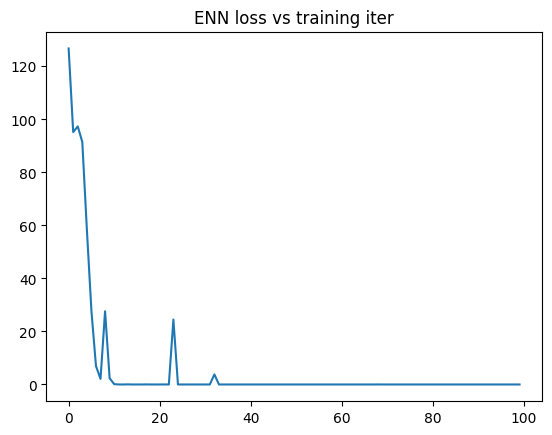

samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.

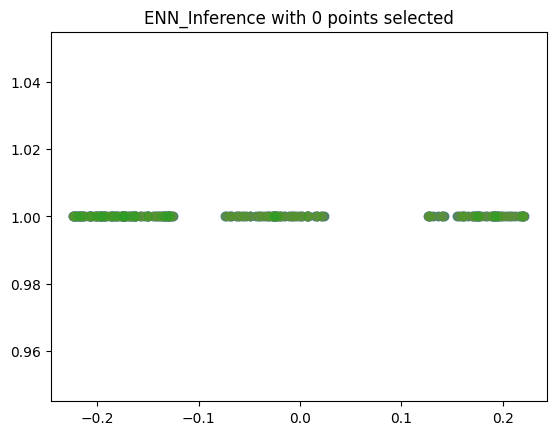

recall list tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<CatBackward0>)
var of recall: tensor(0., grad_fn=<SubBackward0>)
mean of recall tensor(1., grad_fn=<MeanBackward0>)


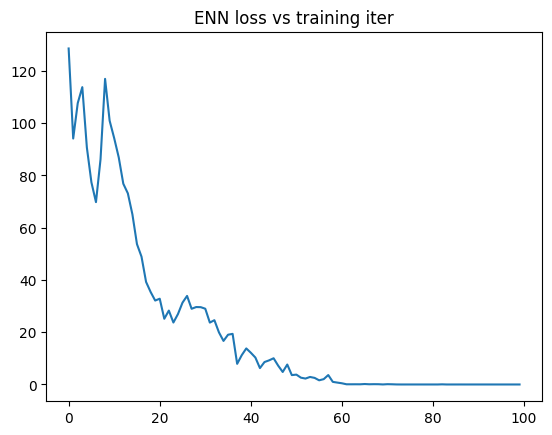

samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.Size([1, 215])
samples_size: torch.

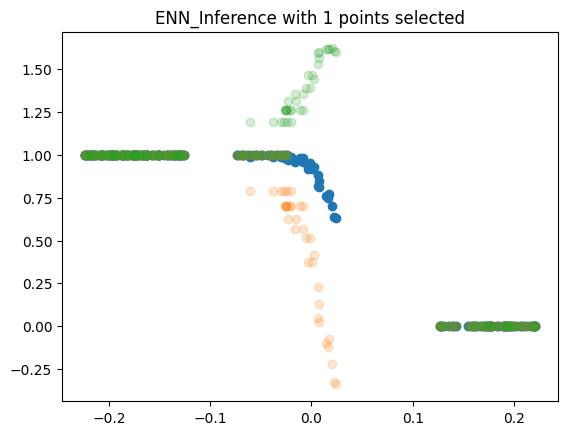

recall list tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<CatBackward0>)
var of recall: tensor(0., grad_fn=<SubBackward0>)
mean of recall tensor(1., grad_fn=<MeanBackward0>)


KeyboardInterrupt: 

In [ ]:

def Inference(UQ_module, Option, if_print, UQ_parameter = []):
    #x = torch.cat([init_train_x,test_x,pool_x])
    if Option == 0: #only training
        #x_train, y_train = x, y_new
        x_train, y_train = x[:num_init_train_samples], y_blr_new[:num_init_train_samples]
    elif Option == 1: # select 2nd point
        x_train = torch.cat([x[:num_init_train_samples],x[-1*num_pool_samples:]])
        y_train = torch.cat([y_blr_new[:num_init_train_samples],y_blr_new[-1*num_pool_samples:]])
    elif Option == 2:
        #x_train = torch.cat([x[:num_init_train_samples],x[num_init_train_samples+num_test_samples*3+num_pool_samples:num_init_train_samples+num_test_samples*3+num_pool_samples*2],x[-1*num_pool_samples:]])
        #y_train = torch.cat([y_new[:num_init_train_samples],y[num_init_train_samples+num_test_samples*3+num_pool_samples:num_init_train_samples+num_test_samples*3+num_pool_samples*2],y_new[-1**num_pool_samples:]])
        x_train = torch.cat([x[:num_init_train_samples],x[num_init_train_samples+num_test_samples*3+num_pool_samples:]])
        y_train = torch.cat([y_blr_new[:num_init_train_samples],y_blr_new[num_init_train_samples+num_test_samples*3+num_pool_samples:]])
    elif Option == 3:
        x_train = x[-3*num_pool_samples:]
        y_train = y_blr_new[-3*num_pool_samples:]
    #print(x_train.shape, y_train.shape)
    #x = x_train
    if UQ_module == 'ENN':
        ENN_trained = ENN_training(x_train, y_train.unsqueeze(dim=1), model_config, train_cfg, enn_config, device , if_print )
        N_iter = UQ_parameter['N_iter_ENN']
        #torch.manual_seed(1)
        samples_list = torch.empty((0), dtype=torch.float32, device=device)

        for i in range(N_iter):
            z_pool = torch.randn(Z_dim, device=device)
            prediction = ENN_trained(x, z_pool) #x is all data

            #probabilities = torch.nn.functional.softmax(prediction, dim=1)
            #probability_a = probabilities[:,0:1]
            #prediction_a_list = torch.cat((prediction_list,probability_a),1)
            distribution = Categorical(logits=prediction)
            #print(prediction)
            # Sample one entry from each distribution in the batch
            samples = distribution.sample((1,))
            #.unsqueeze(dim=1)
            #print("samples_size:", samples.shape)
            samples_list = torch.cat((samples_list,samples),0)

            #print(prediction_list)
        #print("samples_list_size:", samples_list.shape)
        #print("prediction_list:", prediction_list)
        posterior_mean = torch.mean(samples_list, dim=0)
        #print("posterior_mean:", posterior_mean)
        #print(x)
        #print("posterior_mean_size:", posterior_mean.shape)
        posterior_std = torch.std(samples_list, dim=0)
        print("posterior_std:", posterior_std)
        #print("posterior_std_size:", posterior_std.shape)
        #print(posterior_std)
    elif UQ_module == 'simple_nn':
        ENN_trained = SimpleNN_training(x_train, y_train, model_cfg, train_cfg, enn_cfg, device , if_print )
        N_iter = UQ_parameter['N_iter_ENN']
        #torch.manual_seed(1)
        prediction_list = torch.empty((0), dtype=torch.float32, device=device)

        for i in range(N_iter):
            prediction = ENN_trained(x) #x is all data
            prediction_list = torch.cat((prediction_list,prediction),1)
            #print(prediction_list)
        #print("prediction_list:", prediction_list)
        posterior_mean = torch.mean(prediction_list)
        #print("posterior_mean:", posterior_mean)
        #print(posterior_mean)
        posterior_std = torch.std(prediction_list)
        #print("posterior_std:", posterior_std)
        #print(posterior_std)

    plt.scatter(x,posterior_mean.detach().numpy())
    plt.scatter(x.squeeze(),posterior_mean.detach().numpy()-2*posterior_std.detach().numpy(),alpha=0.2)
    plt.scatter(x.squeeze(),posterior_mean.detach().numpy()+2*posterior_std.detach().numpy(),alpha=0.2)
    #plt.ylim(-1, 1)
    plt.title(UQ_module + '_Inference with ' + str(Option) +' points selected')
    plt.show()
    #l2_loss(test_x, test_y, Predictor, device)
    dataset_final = TabularDataset(x = test_x, y = y_gp_new[num_init_train_samples:num_init_train_samples+num_test_samples*3])
    dataloader_final = DataLoader(dataset_final, batch_size=model_config.batch_size_train, shuffle=False)
    var_recall_estimator(ENN_trained, dataloader_final, Predictor, 0, device, None)

UQ_parameter = {'N_iter_ENN':100}
for Option in range(4):
    for UQ_module in ['ENN']:

        Inference(UQ_module, Option, UQ_parameter = UQ_parameter, if_print = 0)

#**Creating the dataset for the pipeline testing**

In [ ]:
num_init_train_samples = 20
num_pool_samples = 5
num_test_samples = 20

input_dim = 1

In [ ]:
init_train_x = torch.rand((num_init_train_samples, input_dim))*50.0/500.0-0.225

test_x_1 = torch.rand((num_test_samples, input_dim))*50.0/500.0-0.225
test_x_2 = 75.0/500.0 + torch.rand((num_test_samples, input_dim))*50.0/500.0-0.225
test_x_3 = 175.0/500.0 + torch.rand((num_test_samples, input_dim))*50.0/500.0-0.225

test_x = torch.cat([test_x_1,test_x_2,test_x_3])

pool_x_1 = 24/500.0 + torch.rand((num_pool_samples, input_dim))*2/500.0-0.225
pool_x_2 = 99/500.0 + torch.rand((num_pool_samples, input_dim))*2/500.0-0.225
pool_x_3 = 199/500.0 + torch.rand((num_pool_samples, input_dim))*2/500.0-0.225

pool_x = torch.cat([pool_x_1,pool_x_2,pool_x_3])

x = torch.cat([init_train_x,test_x,pool_x])
y = torch.zeros(num_init_train_samples+3*num_pool_samples+3*num_test_samples)

init_train_x_numpy = init_train_x.numpy()
init_train_y = torch.zeros(init_train_x.size(0))
test_x_numpy = test_x.numpy()
test_y = torch.ones(test_x.size(0))
pool_x_numpy = pool_x.numpy()
pool_y = torch.empty(pool_x.size(0)).fill_(0.5)


plt.scatter(init_train_x_numpy, init_train_y.numpy(), s=20, label='train')
plt.scatter(test_x_numpy, test_y.numpy(), s=20, label='test')
plt.scatter(pool_x_numpy, pool_y.numpy(), s=20, label='pool')

plt.yticks([])  # Hide y-axis ticks
plt.xlabel('X values')
plt.legend()
plt.title('Distribution of X values along a real line')
plt.show()

In [ ]:
# Define parameters for the model
mean_constant = 0.0  # Mean of the GP
length_scale = 25.0/500.0   # Length scale of the RBF kernel
noise_std = 0.1    # Standard deviation of the noise
output_scale = 5.0


mean_module = gpytorch.means.ConstantMean()
base_kernel = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
likelihood = gpytorch.likelihoods.GaussianLikelihood()


mean_module.constant = mean_constant
base_kernel.base_kernel.lengthscale = length_scale
base_kernel.base_kernel.output_scale = output_scale
likelihood.noise_covar.noise = noise_std**2

class CustomizableGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, mean_module, base_kernel, likelihood):
        super(CustomizableGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = mean_module
        self.covar_module = base_kernel
        self.likelihood = likelihood

    def forward(self, x):
        return gpytorch.distributions.MultivariateNormal(self.mean_module(x), self.covar_module(x))


model = CustomizableGPModel(x, y, mean_module, base_kernel, likelihood)

torch.manual_seed(1)
# Sample from the prior for training data
model.eval()
likelihood.eval()
with torch.no_grad():
    prior_dist = likelihood(model(x))
    y_new = 5*prior_dist.sample()

In [ ]:
y_new = x.squeeze()

In [ ]:
Z_dim = 8
lr_enn = 0.02
wd_enn = 0
n_steps = 200
Basenet_hidden_sizes = [50,50]
Exposed_layers = [False, True]
Learnable_epinet_hiddens = [15,15]
Hidden_sizes_prior = [5,5]
Alpha =5.0
model_cfg = ModelConfig(batch_size_train = 10000, batch_size_test = 500, batch_size_query = 100, temp_k_subset = 0.1, hidden_sizes_weight_NN = [50,50], meta_opt_lr = 0.01, n_classes = 1, n_epoch = 5, init_train_lr = lr_enn, init_train_weight_decay = wd_enn, n_train_init = n_steps, meta_opt_weight_decay = 0.01)
train_cfg = TrainConfig(n_train_iter = 500, n_ENN_iter = 1000, ENN_opt_lr = 0.01, N_iter_noise = 10, sigma_noise = 0.5, seed_var_l2 = 123, z_dim = Z_dim, N_iter = 100, ENN_opt_weight_decay = 0.0001) #temp_var_recall is the new variable added here
enn_cfg = ENNConfig(basenet_hidden_sizes = Basenet_hidden_sizes,  exposed_layers = Exposed_layers, z_dim = Z_dim, learnable_epinet_hiddens = Learnable_epinet_hiddens, hidden_sizes_prior = Hidden_sizes_prior, seed_base = 2, seed_learnable_epinet = 1, seed_prior_epinet = 0, alpha = Alpha)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x = torch.cat([init_train_x,test_x,pool_x])

In [ ]:

def Inference(UQ_module, Option, if_print, UQ_parameter = []):
    #x = torch.cat([init_train_x,test_x,pool_x])
    if Option == 0: #only training
        #x_train, y_train = x, y_new
        x_train, y_train = x[:num_init_train_samples], y_new[:num_init_train_samples]
    elif Option == 1: # select 2nd point
        x_train = torch.cat([x[:num_init_train_samples],x[num_init_train_samples+num_test_samples*3+num_pool_samples*3-2:]])
        y_train = torch.cat([y_new[:num_init_train_samples],y_new[num_init_train_samples+num_test_samples*3+num_pool_samples*3-2:]])
    elif Option == 2:
        #x_train = torch.cat([x[:num_init_train_samples],x[num_init_train_samples+num_test_samples*3+num_pool_samples:num_init_train_samples+num_test_samples*3+num_pool_samples*2],x[-1*num_pool_samples:]])
        #y_train = torch.cat([y_new[:num_init_train_samples],y[num_init_train_samples+num_test_samples*3+num_pool_samples:num_init_train_samples+num_test_samples*3+num_pool_samples*2],y_new[-1**num_pool_samples:]])
        x_train = torch.cat([x[:num_init_train_samples],x[num_init_train_samples+num_test_samples*3+num_pool_samples+1:num_init_train_samples+num_test_samples*3+num_pool_samples*2+2],x[num_init_train_samples+num_test_samples*3+num_pool_samples*3-1:]])
        y_train = torch.cat([y_new[:num_init_train_samples],y_new[num_init_train_samples+num_test_samples*3+num_pool_samples+1:num_init_train_samples+num_test_samples*3+num_pool_samples*2+2],y_new[num_init_train_samples+num_test_samples*3+num_pool_samples*3-1:]])
    elif Option == 3:
        x_train = x[-3*num_pool_samples:]
        y_train = y_new[-3*num_pool_samples:]
    #print(x_train.shape, y_train.shape)
    #x = x_train
    if UQ_module == 'Gaussian_Process':
        print("x_train:", x_train.shape)
        print("y_train:", y_train.shape)
        model.set_train_data(inputs = x_train, targets = y_train, strict=False)       ####### CAN ALSO USE TRAINING OVER NLL HERE########

        ### IMP LINK - https://github.com/cornellius-gp/gpytorch/issues/1409
        ### IMP LINK - https://docs.gpytorch.ai/en/latest/examples/01_Exact_GPs/Simple_GP_Regression.html
        posterior = likelihood(model(x))
        posterior_mean = posterior.mean
        posterior_std = torch.sqrt(posterior.variance)
    elif UQ_module == 'ENN':
        ENN_trained = ENN_training(x_train, y_train.unsqueeze(dim=1), model_cfg, train_cfg, enn_cfg, device , if_print )
        N_iter = UQ_parameter['N_iter_ENN']
        #torch.manual_seed(1)
        prediction_list = torch.empty((0), dtype=torch.float32, device=device)

        for i in range(N_iter):
            z_pool = torch.randn(Z_dim, device=device)
            prediction = ENN_trained(x, z_pool) #x is all data
            prediction_list = torch.cat((prediction_list,prediction),1)
            #print(prediction_list)

        #print("prediction_list:", prediction_list)
        posterior_mean = torch.mean(prediction_list, axis = 1)
        #print("posterior_mean:", posterior_mean)
        #print(posterior_mean)
        posterior_std = torch.std(prediction_list, axis = 1)
        #print("posterior_std:", posterior_std)
        #print(posterior_std)
    elif UQ_module == 'simple_nn':
        ENN_trained = SimpleNN_training(x_train, y_train, model_cfg, train_cfg, enn_cfg, device , if_print )
        N_iter = UQ_parameter['N_iter_ENN']
        #torch.manual_seed(1)
        prediction_list = torch.empty((0), dtype=torch.float32, device=device)

        for i in range(N_iter):
            prediction = ENN_trained(x) #x is all data
            prediction_list = torch.cat((prediction_list,prediction),1)
            #print(prediction_list)
        #print("prediction_list:", prediction_list)
        posterior_mean = torch.mean(prediction_list, axis = 1)
        #print("posterior_mean:", posterior_mean)
        #print(posterior_mean)
        posterior_std = torch.std(prediction_list, axis = 1)
        #print("posterior_std:", posterior_std)
        #print(posterior_std)

    plt.scatter(x,posterior_mean.detach().numpy())
    plt.scatter(x.squeeze(),posterior_mean.detach().numpy()-2*posterior_std.detach().numpy(),alpha=0.2)
    plt.scatter(x.squeeze(),posterior_mean.detach().numpy()+2*posterior_std.detach().numpy(),alpha=0.2)
    plt.ylim(-1, 1)
    plt.title(UQ_module + '_Inference with ' + str(Option) +' points selected')
    plt.show()
    #l2_loss(test_x, test_y, Predictor, device)
    var_l2_loss_estimator(ENN_trained, test_x, Predictor, device, None)

UQ_parameter = {'N_iter_ENN':100}
for Option in range(4):
    for UQ_module in ['ENN']:

        Inference(UQ_module, Option, UQ_parameter = UQ_parameter, if_print = 0)

#**ENN training pipeline**

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import torch
from torch import Tensor
import numpy as np

EPSILON = np.finfo(np.float32).tiny

class SubsetOperator(torch.nn.Module):
    def __init__(self, k, device, tau=1.0, hard=False):            # k is the number of samples we want, tau is the temperature parameter, hard:denotes if we want hard or soft samples
        super(SubsetOperator, self).__init__()
        self.k = k
        self.hard = hard
        self.tau = tau
        self.device=device

    def forward(self, scores):                                # scores take in weights of each sample      # scores: Typical shape: [batch_size,n] or [batch_size,n,1]
        m = torch.distributions.gumbel.Gumbel(torch.zeros_like(scores), torch.ones_like(scores))
        g = m.sample()
        scores = scores + g
        print("g:", g)

        # continuous top k  (we can later modify this to also output S_WRS, we will just need each onehot_approx to be stored seperately - then it will give k soft vectors)
        khot = torch.zeros_like(scores)
        onehot_approx = torch.zeros_like(scores)
        for i in range(self.k):
            khot_mask = torch.max(1.0 - onehot_approx, torch.tensor([EPSILON], device=self.device))            # we can autodiff through this, there is no issue .
            # khot_mask = torch.max(1.0 - onehot_approx, torch.tensor([EPSILON]).cuda())      #CHECK MIGHT NEED TO PUT DEVICE HERE,
            scores = scores + torch.log(khot_mask)
            onehot_approx = torch.nn.functional.softmax(scores / self.tau, dim=1)
            khot = khot + onehot_approx

        if self.hard:
            # will do straight through estimation if training
            khot_hard = torch.zeros_like(khot)
            val, ind = torch.topk(khot, self.k, dim=1)
            khot_hard = khot_hard.scatter_(1, ind, 1)
            res = khot_hard - khot.detach() + khot
        else:
            res = khot

        return res

In [ ]:
def weighted_l2_loss(prediction, targets, weights):
    #print("targets:", targets)
    #print("prediction:", prediction)
    l2_loss = torch.square(torch.subtract(targets, prediction))
    #print("l2_loss:", l2_loss)
    weighted_loss = l2_loss.squeeze() * weights
    #print("weighted_loss:", weighted_loss)
    return weighted_loss.sum()

In [ ]:
init_train_y_new = y_new[:num_init_train_samples]

test_y_new = y_new[num_init_train_samples:num_init_train_samples+num_test_samples*3]

pool_y_new = y_new[num_init_train_samples+num_test_samples*3:]

In [ ]:
import math

In [ ]:
def train(ENN, init_train_x, init_train_y, pool_x, pool_y, test_x, test_y, device, train_config, enn_config, NN_weights, meta_opt, SubsetOperator, Predictor, seed, if_print = True):
  meta_loss_list = []
  ENN.train()


  for i in range(train_config.n_train_iter):    # Should we do this multiple times or not
    start_time = time.time()

    meta_opt.zero_grad()

    #pool_weights = NN_weights(pool_x)   #pool_weights has shape [pool_size,1]
    #pool_weights_t = pool_weights.t()  #convert pool_weights to shape [1, pool_size]

    #set seed

    NN_weights_unsqueezed = NN_weights.unsqueeze(0)
    soft_k_vector = SubsetOperator(NN_weights_unsqueezed)
    soft_k_vector_squeeze = soft_k_vector.squeeze()
    clipped_soft_k_vector_squeeze = torch.clamp(soft_k_vector_squeeze, min=-float('inf'), max=1.0)
    print(clipped_soft_k_vector_squeeze)


    input_feature_size = init_train_x.size(1)
    init_train_batch_size = init_train_x.size(0)


    y_gp = (torch.cat([init_train_y,pool_y], dim=0)).unsqueeze(dim=1)      ####################################### very important  #################################################
    x_gp = torch.cat([init_train_x,pool_x], dim=0)
    w_train = torch.ones(init_train_batch_size, requires_grad = True)
    w_gp = torch.cat([w_train,clipped_soft_k_vector_squeeze])

    ENN_opt = torch.optim.Adam(ENN.parameters(), lr=train_config.ENN_opt_lr, weight_decay=train_config.ENN_opt_weight_decay)
    enn_loss_list = []
    with higher.innerloop_ctx(ENN, ENN_opt, copy_initial_weights=False) as (fnet, diffopt):
      for i in range(train_config.n_ENN_iter):
          total_loss = 0
          for j in range(100):
              z = torch.randn(enn_config.z_dim, device=device)
              outputs = fnet(x_gp,z)

            #labels = torch.tensor(labels, dtype=torch.long, device=device)
              total_loss += weighted_l2_loss(outputs, y_gp, w_gp)
          diffopt.step(total_loss)
          enn_loss_list.append(float(total_loss.detach().to('cpu').numpy()))

      plt.plot(list(range(len(enn_loss_list))),enn_loss_list)
      plt.title('ENN loss vs training iter')
      plt.show()

      var_square_loss = var_l2_loss_estimator(fnet, test_x, Predictor, device, None)
      var_square_loss.backward()
      meta_opt.step()
      print("NN_weights:", NN_weights)
      l_2_loss_actual = l2_loss(test_x, test_y, Predictor, device)



In [ ]:
Z_dim = 8
lr_enn = 0.02
wd_enn = 0
n_steps = 200
Basenet_hidden_sizes = [50,50]
Exposed_layers = [False, True]
Learnable_epinet_hiddens = [15,15]
Hidden_sizes_prior = [5,5]
Alpha =5.0
model_cfg = ModelConfig(batch_size_train = 10000, batch_size_test = 500, batch_size_query = 2, temp_k_subset = 0.1, hidden_sizes_weight_NN = [50,50], meta_opt_lr = 0.2, n_classes = 1, n_epoch = 5, init_train_lr = lr_enn, init_train_weight_decay = wd_enn, n_train_init = n_steps, meta_opt_weight_decay = 0.000)
train_cfg = TrainConfig(n_train_iter = 1000, n_ENN_iter = n_steps, ENN_opt_lr = lr_enn, N_iter_noise = 10, sigma_noise = 0.5, seed_var_l2 = 123, z_dim = Z_dim, N_iter = 100, ENN_opt_weight_decay = wd_enn) #temp_var_recall is the new variable added here
enn_cfg = ENNConfig(basenet_hidden_sizes = Basenet_hidden_sizes,  exposed_layers = Exposed_layers, z_dim = Z_dim, learnable_epinet_hiddens = Learnable_epinet_hiddens, hidden_sizes_prior = Hidden_sizes_prior, seed_base = 2, seed_learnable_epinet = 1, seed_prior_epinet = 0, alpha = Alpha)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x = torch.cat([init_train_x,test_x,pool_x])

ENN = basenet_with_learnable_epinet_and_ensemble_prior(1, enn_cfg.basenet_hidden_sizes, model_cfg.n_classes, enn_cfg.exposed_layers, enn_cfg.z_dim, enn_cfg.learnable_epinet_hiddens, enn_cfg.hidden_sizes_prior, enn_cfg.seed_base, enn_cfg.seed_learnable_epinet, enn_cfg.seed_prior_epinet, enn_cfg.alpha).to(device)



In [ ]:
input_feature_size = init_train_x.size(1)
#NN_weights = NN_feature_weights(input_feature_size, model_config.hidden_sizes_weight_NN, 1).to(device)
tensor_size = pool_x.size(0) #  This could be tensor.shape[0] for the first dimension size, for example
SubsetOperatorthis = SubsetOperator(model_cfg.batch_size_query, device, model_cfg.temp_k_subset, False).to(device)
reciprocal_size_value =  math.log(1.0 / tensor_size)

In [ ]:
# Now compute the logarithm of the reciprocal
NN_weights = torch.full([tensor_size], reciprocal_size_value, requires_grad=True)
meta_opt = optim.Adam([NN_weights], lr=model_cfg.meta_opt_lr, weight_decay=model_cfg.meta_opt_weight_decay)       # meta_opt is optimizer for parameters of NN_weights    #seed for this
seed = 0
train(ENN,init_train_x, init_train_y_new, pool_x, pool_y_new, test_x, test_y_new, device, train_cfg, enn_cfg, NN_weights, meta_opt, SubsetOperatorthis, Predictor, seed, if_print = True)
NN_weights_new = NN_weights